# FR - Etude de marché sur le vin

Le client, le Domaine des Croix, cherche à **définir le prix** de ses bouteilles de vin **pour le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que tu conseilles de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.

Tu trouveras ci-dessous des trames pour te guider dans cette analyse. Effectue tout d'abord la trame commune. Puis, tu peux suivre l'une de ces trames (Machine Learning ou Business Intelligence). **Ne cherche pas à effectuer les deux trames ! Choisir, c'est renoncer. Le client préfère un travail qualitatif plutôt qu'un travail exhaustif.**
Mais tu peux aussi partir dans d'autres directions pour répondre à la problématique du client. Si tu as des bonnes idées à proposer au client, elles sont évidemment les bienvenues. C'est toi le Data Analyst maintenant. 




# Jeux de données
- Dataset des 130k vins : https://github.com/murpi/wilddata/raw/master/wine.zip
- Dataset des 14 vins du Domaine des Croix : https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv


# Livrables attendus
Le client souhaite une présentation de 10 minutes suivi de 10 minutes de questions. 
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- Présentation de la partie technique et du code créé pour cette analyse
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain


# EN - Wine market study

The client, Domaine des Croix, is looking to define the price of its wine bottles for the US market. They have retrieved a set of 130k bottles of wine, with grape varieties, countries and regions of production, vintages (i.e. years of production), as well as notes ("points") and descriptions from oenologists (wine specialists), and the price of all these bottles on the American market.

**The objective will be to make a presentation of the market analysis and the price you recommend for the client's wines.** The client is not a data analyst, but would like to understand the process. You will have to explain how the prices were set, without getting too technical, in other words: make it easy to understand.

You will find below some frames to guide you in this analysis. First, do the common framework. Then, you can follow one of these frames (Machine Learning or Business Intelligence). **Don't try to do both frames! To choose is to give up. The client prefers qualitative work to exhaustive work.**
But you can also go in other directions to answer the client's problem. If you have good ideas to propose to the client, they are obviously welcome. You're the data analyst now. 




# Data sets
- Dataset of 130k wines: https://github.com/murpi/wilddata/raw/master/wine.zip
- Dataset of the 14 Domaine des Croix wines: https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv


# Expected deliverables
The client would like an 10 minutes presentation followed by 10 minutes of questions. 
The presentation will contain at least these elements:
- Reminder of the context and the problem
- Exploratory analysis of the data
- Methodology, tools and languages used
- Presentation of the technical part and the code created for this analysis
- Answer to the business question: price proposal or price range to the client to be correctly positioned against the competition on the American market

# Common framework: data preparation and exploratory analysis





## FR - Preprocessing
La colonne "title" contient le domaine, le millésime et le cépage ("variety"). Tu dois isoler le millésime (l'année) dans une colonne dédiée.


## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Tu vas donc réaliser un ensemble de dataviz, avec l'outil de ton choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Par exemple : 
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...

Le client souhaiterait un zoom spécifique sur le cépage ("variety") Pinot Noir.


## Descriptions
Quels sont les mots qui ressortent le plus dans les descriptions des vins ? Et spécifiquement pour le pinot noir, est-ce très différent ?  Et pour la province Burgundi en France ?



## EN - Preprocessing
The "title" column contains the domain, the vintage and the variety. You must isolate the vintage (year) in a dedicated column.


## Market analysis
Domaine des Croix would like a descriptive analysis of the wine market. You will therefore make a set of dataviz, with the tool of your choice (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). For example : 
- the distribution of the number of wines per country
- the countries with the best scores
- the average scores by grape variety
- the distribution by decile
- etc...

The client would like a specific zoom on the Pinot Noir variety.


## Descriptions
What words stand out the most in the wine descriptions? And specifically for Pinot Noir, is it very different?  What about the Burgundi province in France?


In [ ]:
# Importer les bibliothèques requises

import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#Les Datas
df_wine=pd.read_csv("https://github.com/murpi/wilddata/raw/master/wine.zip")
df_domaineCroix=pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/domaine_des_croix.csv")

In [ ]:
# Données pour lesquelles les prix doivent être estimés.
df_domaineCroix

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix
1,France,A rich wine with great fruits as well as struc...,La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix
2,France,"A perfumed village wine, this is made from fou...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Beaune,Pinot Noir,Domaine des Croix
3,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Beaune,Pinot Noir,Domaine des Croix
4,France,This wine is perfumed with cherries and red be...,Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 Les Grèves Premier Cru ...,Pinot Noir,Domaine des Croix
5,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Pinot Noir,Domaine des Croix
6,France,"While this wine is firm, with some fine tannin...",Les Cent-Vignes Premier Cru,93,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 Les Cent-Vignes Premier...,Pinot Noir,Domaine des Croix
7,France,This wine has a smoky character that gives an ...,Grèves,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Grèves (Corton),Pinot Noir,Domaine des Croix
8,France,"Dark fruit backs up the dense, dark and firm c...",La Vigne au Saint,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix
9,France,"A fine, mineral, structured wine with a very d...",Bressandes Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Bressandes Premier Cru ...,Pinot Noir,Domaine des Croix


In [ ]:
#Données à utiliser pour la révision des prix
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2017 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2017 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,29.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2017 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Future Engineering(Millésime)

In [ ]:
df_domaineCroix['year']=df_domaineCroix['title'].apply(lambda x: int(re.findall('\d+',x)[0]))
df_domaineCroix['year'].unique()
# Les données à estimer ont une valeur entre 2014-2019.

array([2016, 2017, 2019, 2015, 2018, 2014])

In [ ]:
df_wine['year']=df_wine['title'].apply(lambda x: re.findall('( 1[4|5|6|7|8|9][0-9]{2}|[2][0][01][0-9]|202[0-2] )',x))
df_wine['year']=df_wine['year'].apply(lambda x: np.NaN if len(x)==0 else int(max(x)))
np.sort(df_wine['year'].unique())
# Les données données pour l'éducation varient entre 1821 et 2021, sans compter les années 1503 et 1607.

array([1503., 1607., 1821., 1827., 1847., 1868., 1872., 1882., 1887.,
       1904., 1919., 1927., 1934., 1935., 1941., 1945., 1947., 1952.,
       1957., 1961., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1977., 1978., 1980., 1982., 1984., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021.,   nan])

In [ ]:
# Je vérifie si les années que j'ai trouvées sont correctes !!!!
df_wine[df_wine['year'].isnull()==True]
# Il semble qu'il n'y ait pas de problème. Ceux qui viennent avec des années d'expérience n'écrivent généralement pas la date du millésime sur le titre.

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,91.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,NaN
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,87.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,NaN
237,Italy,The wine boasts a beautiful appearance thanks ...,NaN,85,34.0,Central Italy,San Marino,NaN,NaN,NaN,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,NaN
315,Italy,"Honey, almond blossom and citrus zest are foll...",Extra Dry,86,31.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,NaN
326,Italy,Drying mineral tones face off with luscious pe...,Extra Dry,86,31.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Marsuret NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Marsuret,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129696,US,"Dark and intriguing, this wine offers notes of...",NaN,86,26.0,Virginia,Virginia,NaN,NaN,NaN,Molliver Vineyards NV Chambourcin (Virginia),Chambourcin,Molliver Vineyards,NaN
129705,France,In order to maintain freshness and crispness i...,Domaine Vieilles Vignes Brut,90,86.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,Champagne Blend,Bruno Gobillard,NaN
129729,France,"Crisp and fruity, this mature-tasting wine has...",Réserve Brut,90,115.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Castelnau NV Réserve Brut (Champagne),Champagne Blend,Castelnau,NaN
129855,US,"This wine hits the mark, combining intriguing ...",Brut,90,52.0,California,California,California Other,Jim Gordon,@gordone_cellars,Biltmore Estate NV Brut Sparkling (California),Sparkling Blend,Biltmore Estate,NaN


In [ ]:
df_wine['year'].isnull().sum()/len(df_wine['year'])
# Il y a 4609 year avec nan. Je peux les supprimer ou les remplir, je déciderai en regardant l'analyse avec median ou moyennes.

0.0354655770754942

In [ ]:
df_wine['year'].describe().T
# La médiane et la moyenne peuvent être remplies très près l'une de l'autre. Je préférerai la médiane.

count    125348.000000
mean       2014.654003
std           4.491558
min        1503.000000
25%        2013.000000
50%        2015.000000
75%        2017.000000
max        2021.000000
Name: year, dtype: float64

In [ ]:
# Je trouve l'année actuelle
from datetime import datetime
currentYear = datetime.now().year
currentYear

2022

In [ ]:
#Tenur_vintage (millésimme) # Je pense qu'il serait préférable de savoir quel âge il a au lieu du millésime dans l'estimation.
df_domaineCroix['tenur_vintage']=currentYear-df_domaineCroix['year']
df_domaineCroix['tenur_vintage']

0     6
1     5
2     6
3     3
4     5
5     7
6     4
7     6
8     4
9     3
10    4
11    8
12    8
13    4
Name: tenur_vintage, dtype: int64

In [ ]:
df_wine['tenur_vintage']=currentYear-df_wine['year']
df_wine['tenur_vintage']

0          5.0
1          7.0
2          5.0
3          5.0
4          6.0
          ... 
129952     5.0
129953    14.0
129954     5.0
129955     6.0
129956     6.0
Name: tenur_vintage, Length: 129957, dtype: float64

In [ ]:
df_wine.to_csv('df_wine')

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Tu vas donc réaliser un ensemble de dataviz, avec l'outil de ton choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Par exemple : 
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...

Le client souhaiterait un zoom spécifique sur le cépage ("variety") Pinot Noir.



# Exploratory Data Analysis(EDA)

In [ ]:
# Reconnaître et comprendre les données en général
def check_df(dataframe, head=5):
  # Gets the shape, dtypes, head, tail, info and quantiles of the data.

    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Info ####################")
    print(dataframe.info())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df_wine)

##################### Shape #####################
(129957, 15)
##################### Types #####################
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
year                     float64
tenur_vintage            float64
dtype: object
##################### Head #####################
    country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   

In [ ]:
# Identification des colonnes catégorielles et numériques

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.
    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optional
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical view cardinal variable list
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car,num_but_cat
cat_cols, num_cols, cat_but_car,num_but_cat= grab_col_names(df_wine)

Observations: 129957
Variables: 15
cat_cols: 3
num_cols: 4
cat_but_car: 8
num_but_cat: 0


In [ ]:
cat_cols

['region_2', 'taster_name', 'taster_twitter_handle']

                   region_2     Ratio
Central Coast         11065  8.514355
Sonoma                 9028  6.946913
Columbia Valley        8103  6.235139
Napa                   6814  5.243273
Willamette Valley      3423  2.633948
California Other       2663  2.049139
Finger Lakes           1777  1.367375
Sierra Foothills       1462  1.124987
Napa-Sonoma            1169  0.899528
Central Valley         1062  0.817193
Southern Oregon         917  0.705618
Oregon Other            727  0.559416
Long Island             680  0.523250
North Coast             584  0.449379
Washington Other        534  0.410905
South Coast             272  0.209300
New York Other          231  0.177751
##########################################


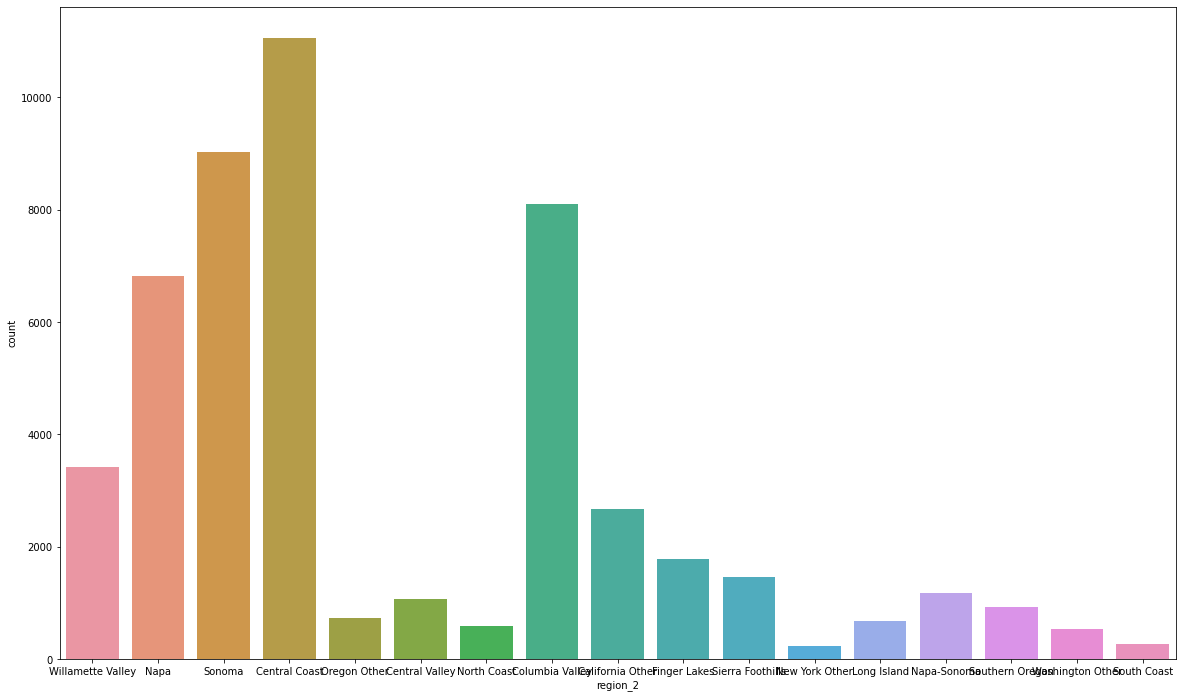

                    taster_name      Ratio
Roger Voss                25500  19.621875
Michael Schachner         15134  11.645390
Kerin O’Keefe             10776   8.291973
Virginie Boone             9537   7.338581
Paul Gregutt               9532   7.334734
Matt Kettmann              6332   4.872381
Joe Czerwinski             5147   3.960541
Sean P. Sullivan           4966   3.821264
Anna Lee C. Iijima         4415   3.397278
Jim Gordon                 4177   3.214140
Anne Krebiehl MW           3685   2.835553
Lauren Buzzeo              1835   1.412006
Susan Kostrzewa            1085   0.834892
Mike DeSimone               514   0.395515
Jeff Jenssen                491   0.377817
Alexander Peartree          415   0.319336
Carrie Dykes                139   0.106958
Fiona Adams                  27   0.020776
Christina Pickard             6   0.004617
##########################################


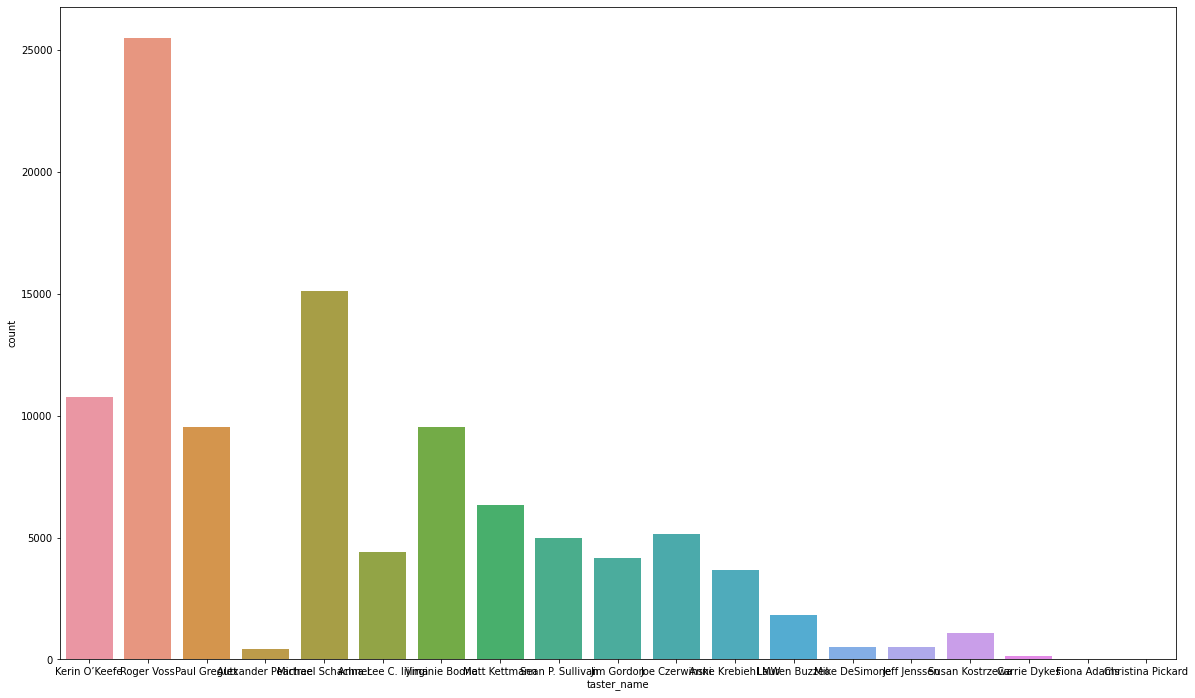

                  taster_twitter_handle      Ratio
@vossroger                        25500  19.621875
@wineschach                       15134  11.645390
@kerinokeefe                      10776   8.291973
@vboone                            9537   7.338581
@paulgwine                         9532   7.334734
@mattkettmann                      6332   4.872381
@JoeCz                             5147   3.960541
@wawinereport                      4966   3.821264
@gordone_cellars                   4177   3.214140
@AnneInVino                        3685   2.835553
@laurbuzz                          1835   1.412006
@suskostrzewa                      1085   0.834892
@worldwineguys                     1005   0.773333
@bkfiona                             27   0.020776
@winewchristina                       6   0.004617
##########################################


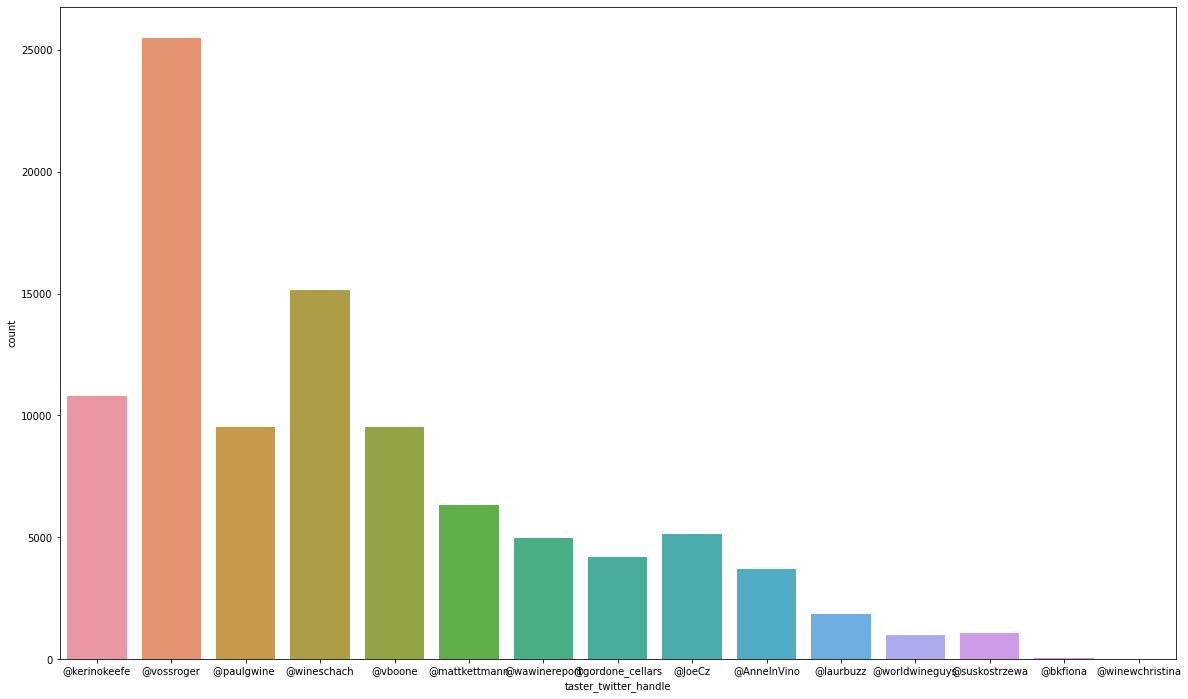

In [ ]:
# Analyse qualitative des colonnes
def cat_summary(dataframe, col_name, plot=False):
  # This function allows us to analyze categorical variables collectively. 
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        plt.figure(figsize=(20,12))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
for i in cat_cols:
  cat_summary(df_wine,i, plot=True)
# L'estimation de la région 2 ne fonctionnera pas pour nous non plus. mais en moyenne 30% est plein. ne représente pas grand-chose dans les données.
# Pour taster name, il n'est rempli qu'à 70%. cependant, comme la donnée à estimer est toujours le même taster name , je ne pense pas que cette donnée nous sera très utile.
# Les informations sur  taster twitter handle  ont le même rapport que taster name et peuvent être considérées comme la même chose. Cela ne nous sera d'aucune utilité pour la prévision.

In [ ]:
cat_but_car

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'title',
 'variety',
 'winery']

In [ ]:
for i in ['country','province','variety', 'winery']:
  cat_summary(df_wine,i, plot=False)
#Country: en cok sarabin uretildigi ulkeler tahminleme icin filtrelenebilir.
#province: %27 california en yuksek digerleri daha dusuk degere sahip
#variety: en cok kullanilan pinot noir oldugu gorunuyor
#winery cok fazla isimize yarayacak bir bilgiye sahip degil 

                        country      Ratio
US                        54504  41.940026
France                    22079  16.989466
Italy                     19540  15.035743
Spain                      6645   5.113230
Portugal                   5691   4.379141
Chile                      4472   3.441138
Argentina                  3800   2.924044
Austria                    3345   2.573928
Australia                  2329   1.792131
Germany                    2165   1.665936
New Zealand                1419   1.091900
South Africa               1401   1.078049
Israel                      505   0.388590
Greece                      466   0.358580
Canada                      257   0.197758
Hungary                     146   0.112345
Bulgaria                    141   0.108497
Romania                     120   0.092338
Uruguay                     109   0.083874
Turkey                       90   0.069254
Slovenia                     87   0.066945
Georgia                      86   0.066176
England    

In [ ]:
# Analyse quanitative des colonnes
num_cols

['points', 'price', 'year', 'tenur_vintage']

count    129957.000000
mean         88.446655
std           3.039481
min          80.000000
5%           84.000000
10%          85.000000
20%          86.000000
30%          87.000000
40%          88.000000
50%          88.000000
60%          89.000000
70%          90.000000
80%          91.000000
90%          92.000000
95%          93.000000
99%          95.000000
max         100.000000
Name: points, dtype: float64


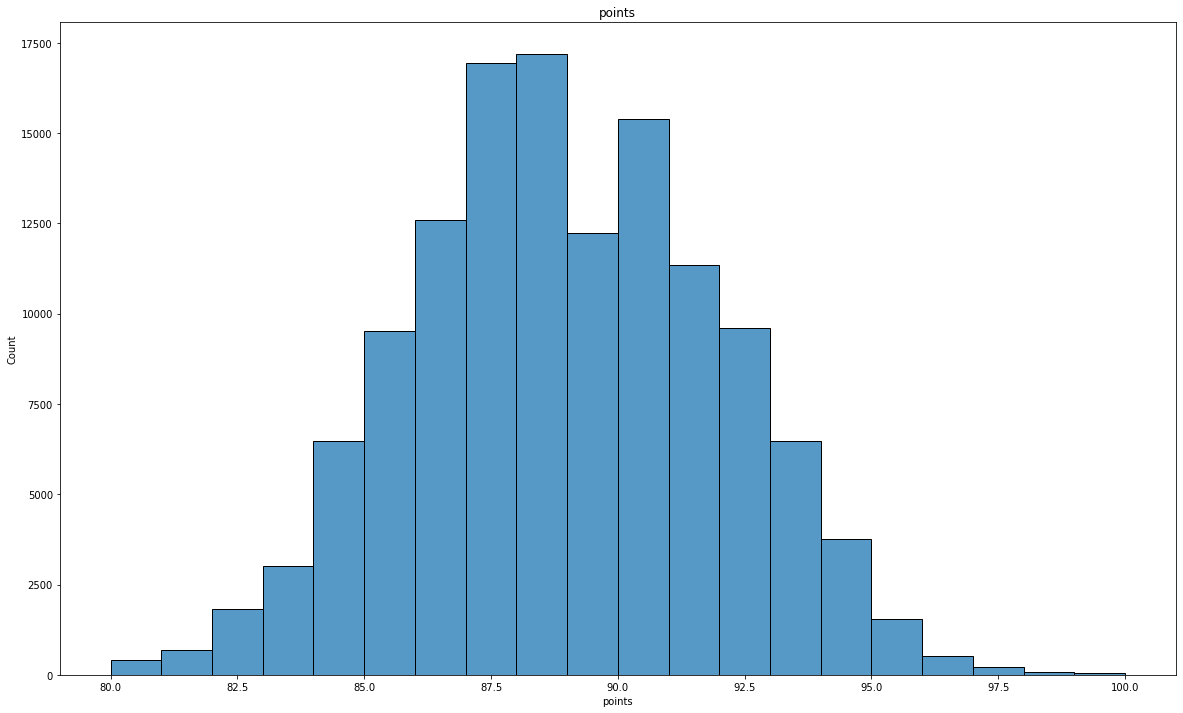

count    120964.000000
mean         36.390827
std          32.802430
min           2.000000
5%           13.000000
10%          16.000000
20%          19.000000
30%          22.000000
40%          26.000000
50%          29.000000
60%          34.000000
70%          39.000000
80%          47.000000
90%          61.000000
95%          80.000000
99%         141.000000
max        1902.000000
Name: price, dtype: float64


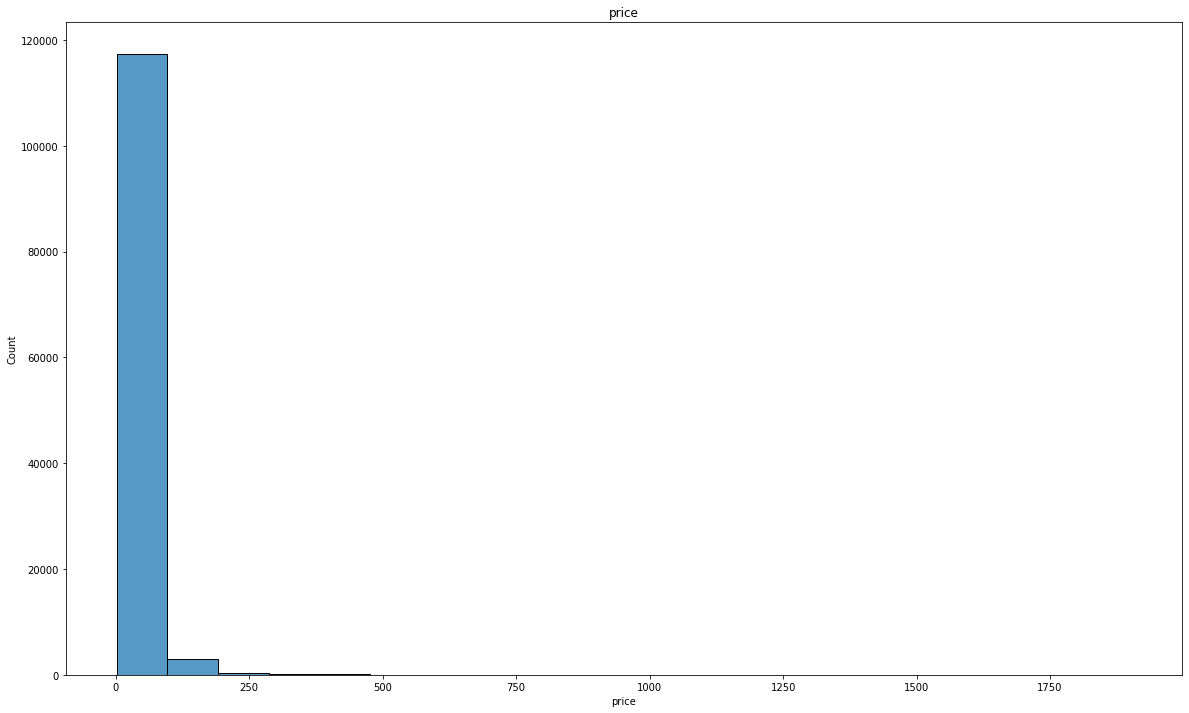

count    125348.000000
mean       2014.654003
std           4.491558
min        1503.000000
5%         2009.000000
10%        2010.000000
20%        2012.000000
30%        2013.000000
40%        2014.000000
50%        2015.000000
60%        2016.000000
70%        2017.000000
80%        2018.000000
90%        2019.000000
95%        2019.000000
99%        2020.000000
max        2021.000000
Name: year, dtype: float64


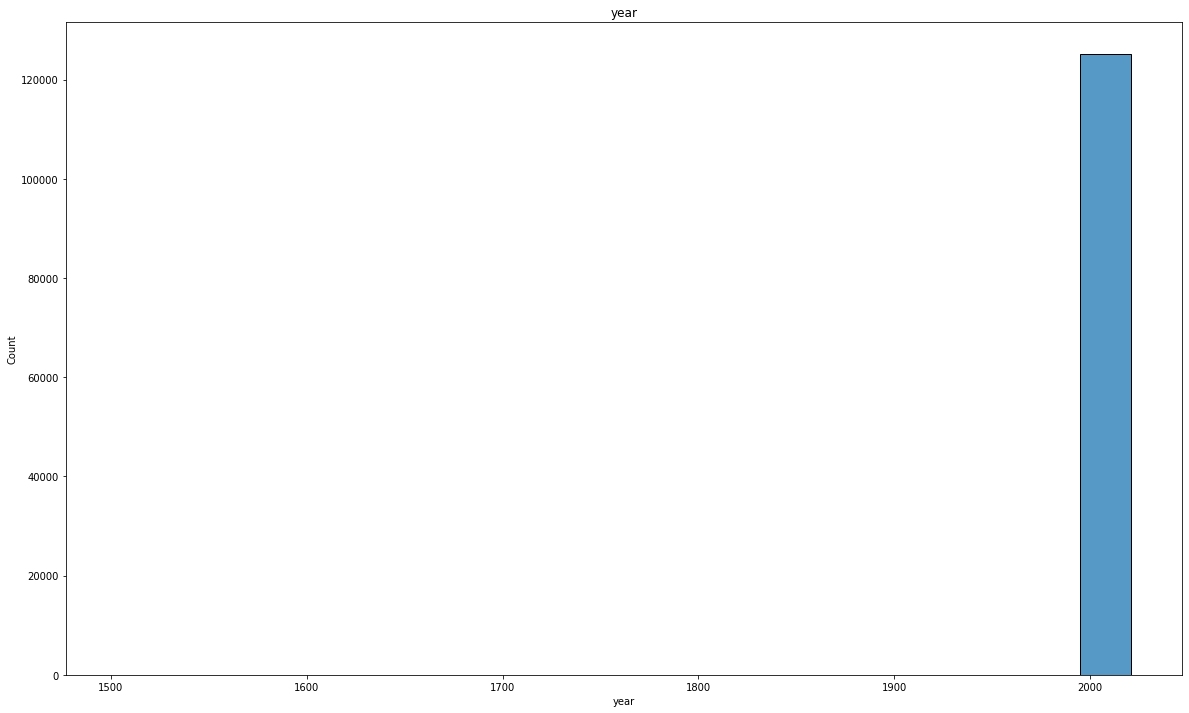

count    125348.000000
mean          7.345997
std           4.491558
min           1.000000
5%            3.000000
10%           3.000000
20%           4.000000
30%           5.000000
40%           6.000000
50%           7.000000
60%           8.000000
70%           9.000000
80%          10.000000
90%          12.000000
95%          13.000000
99%          19.000000
max         519.000000
Name: tenur_vintage, dtype: float64


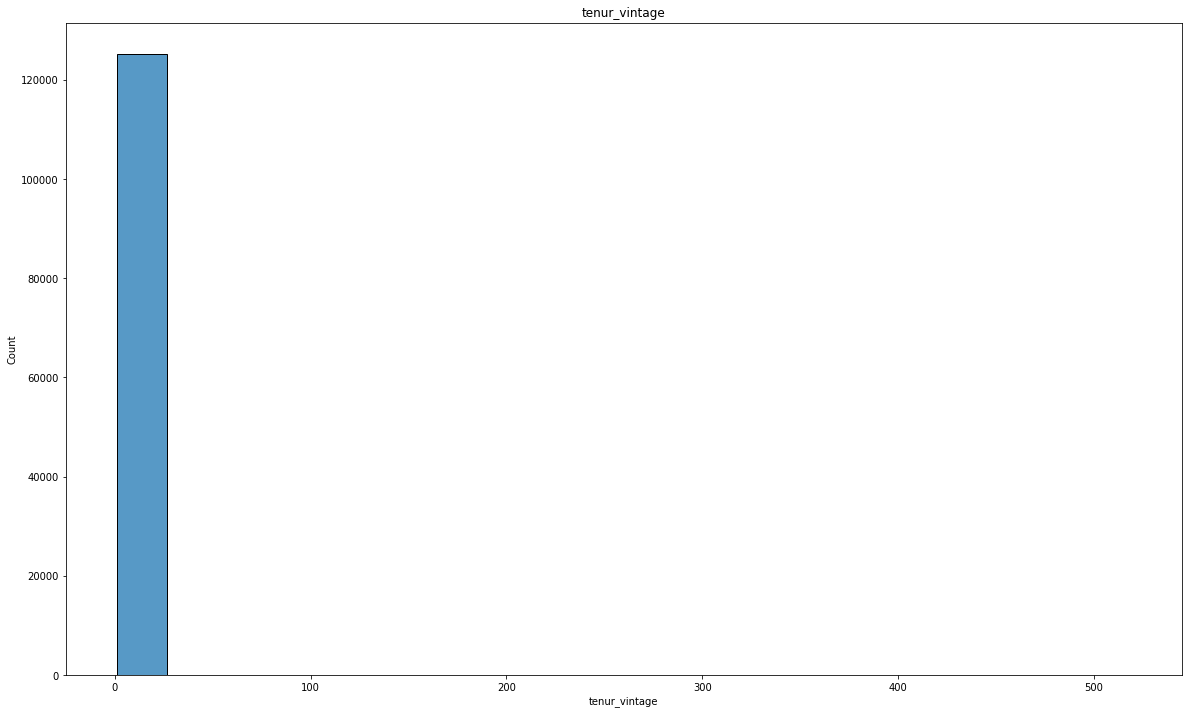

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
  # It allows us to analyze numerical variables collectively. 
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
      plt.figure(figsize=(20,12))
      sns.histplot(bins=20,data=dataframe,x=numerical_col)
      plt.xlabel(numerical_col)
      plt.title(numerical_col)
      plt.show()
for i in num_cols:
  num_summary(df_wine,i, plot=True)

#point hisplotuna bakarsak dagilimin normale yakin oldugunu gorebiliriz.en yuksek puan 100 en dusuk 80 ve ortalamasi da 88 yani median ve mean birbirine cok yakin.
#price histogramina bakarsak min 2 ve maximum 1902 median: 29 mean:36 %99 quantile 141 gorunuyor. yani outlier var ama sayisi az bu nedenle silinebilir aslinda.
# yil ve tenur vintage ayni sey oldugu icin ikisindede outlierlar var ve onlari silmek iyi olabilir . zaten tahmin edilmesi istenen saraplar 2000 yilindan sonrakiler. 



points: False


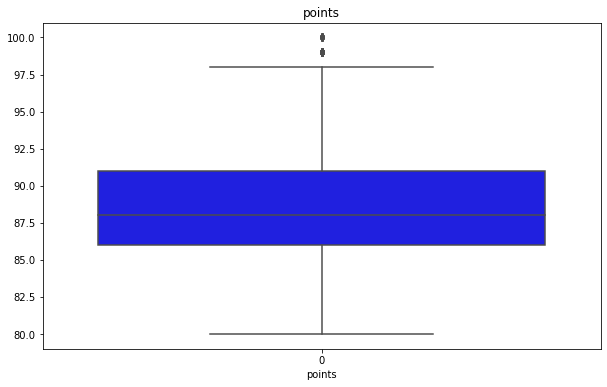

price: True


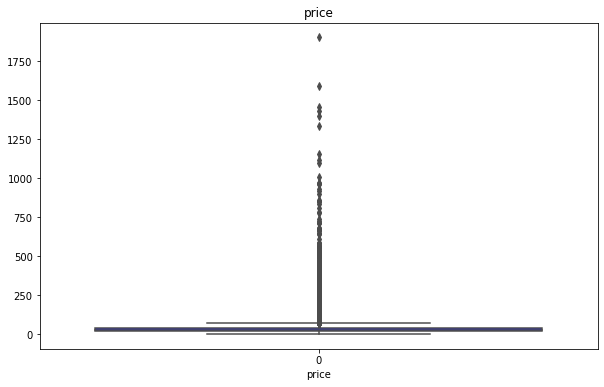

year: True


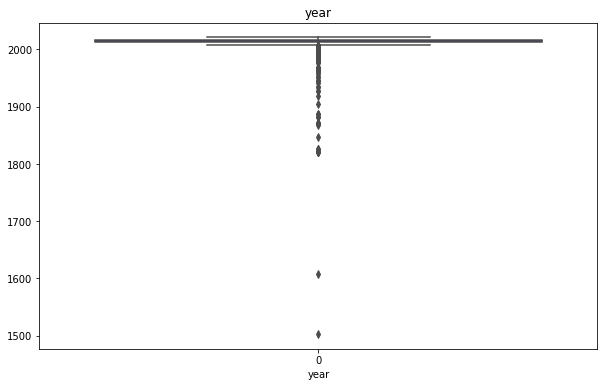

tenur_vintage: True


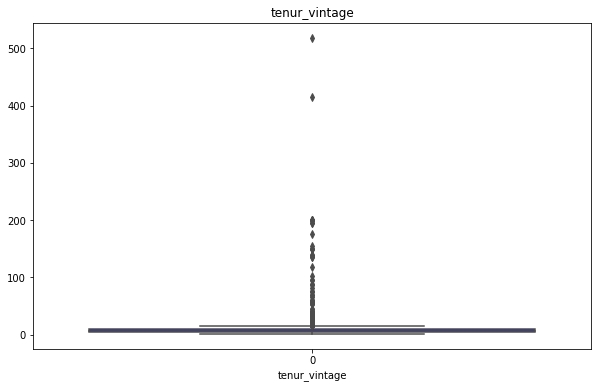

In [ ]:
# Analyse des valeurs aberrantes(outliers)
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
  # Determines the lower and upper limits of the outliers. 
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
for i in num_cols:
  outlier_thresholds(df_wine,i)
def check_outlier(dataframe, col_name, plot=False):
 # according to the lower and upper limit, if there are outliers ; returns them true.
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
      print(f"{col_name}: True")
      if plot==True:
        plt.figure(figsize=(10,6))
        sns.boxplot(data=dataframe[col_name], color='blue')
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show()
    else:
      print(f"{col_name}: False")
      if plot==True:
        plt.figure(figsize=(10,6))
        sns.boxplot(data=dataframe[col_name], color='blue')
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show()
        return False

for i in num_cols:
  check_outlier(df_wine,i, plot=True)

#daha oncede tahmin ettigimiz gibi burda da year tenur vintage ve price ta outlirslar var. bunlari silmek iyi olacak.

           points
price            
2.0     80.000000
3.0     80.000000
4.0     80.250000
5.0     80.627451
6.0     80.805825
...           ...
1396.0  94.000000
1429.0  97.000000
1457.0  88.000000
1590.0  96.000000
1902.0  96.000000

[449 rows x 1 columns]




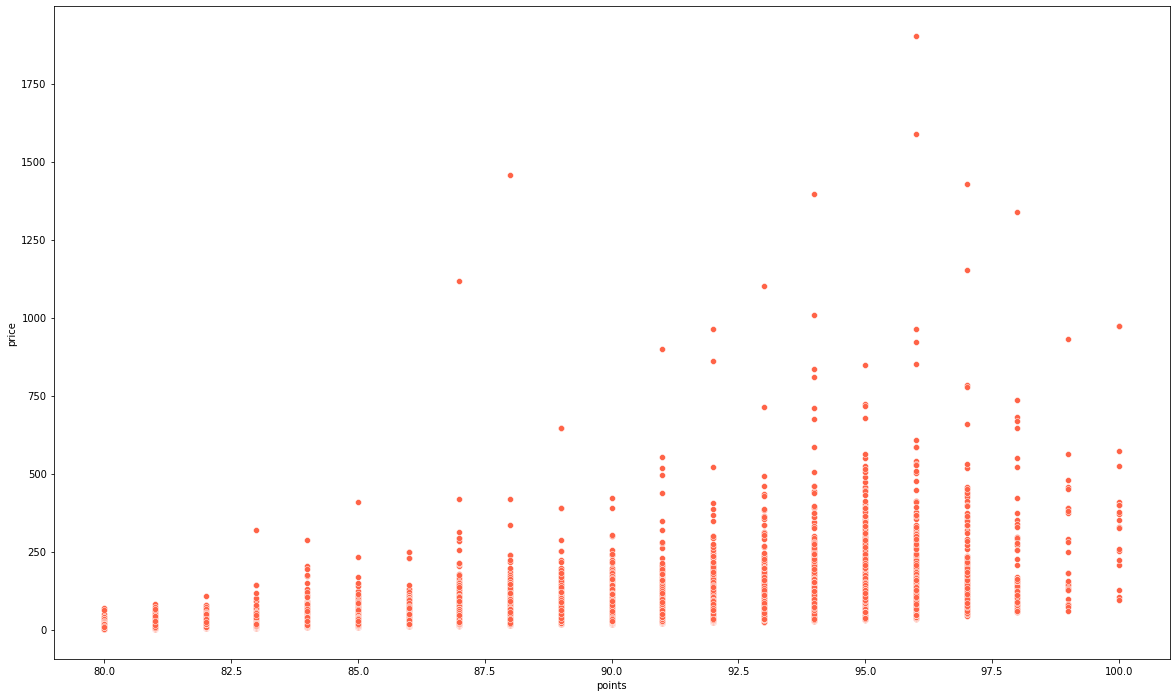

         price
price         
2.0        2.0
3.0        3.0
4.0        4.0
5.0        5.0
6.0        6.0
...        ...
1396.0  1396.0
1429.0  1429.0
1457.0  1457.0
1590.0  1590.0
1902.0  1902.0

[449 rows x 1 columns]




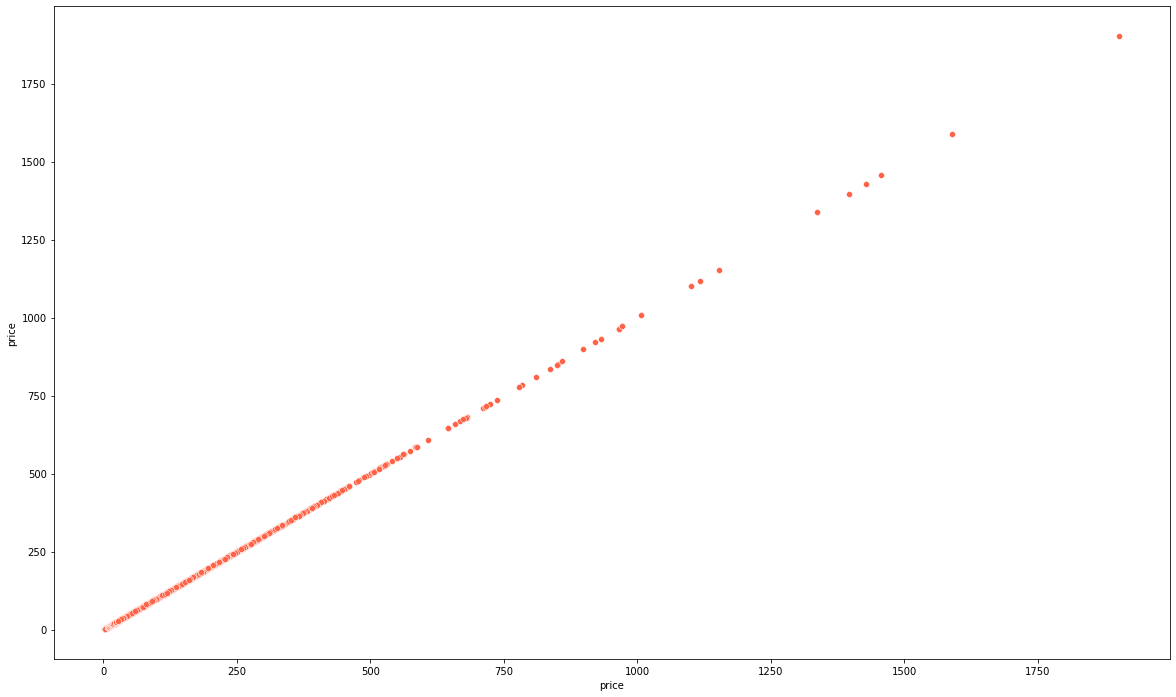

               year
price              
2.0     2017.000000
3.0     2018.200000
4.0     2017.678571
5.0     2017.568627
6.0     2016.679612
...             ...
1396.0  1935.000000
1429.0          NaN
1457.0  2017.000000
1590.0  2014.000000
1902.0  2009.000000

[449 rows x 1 columns]




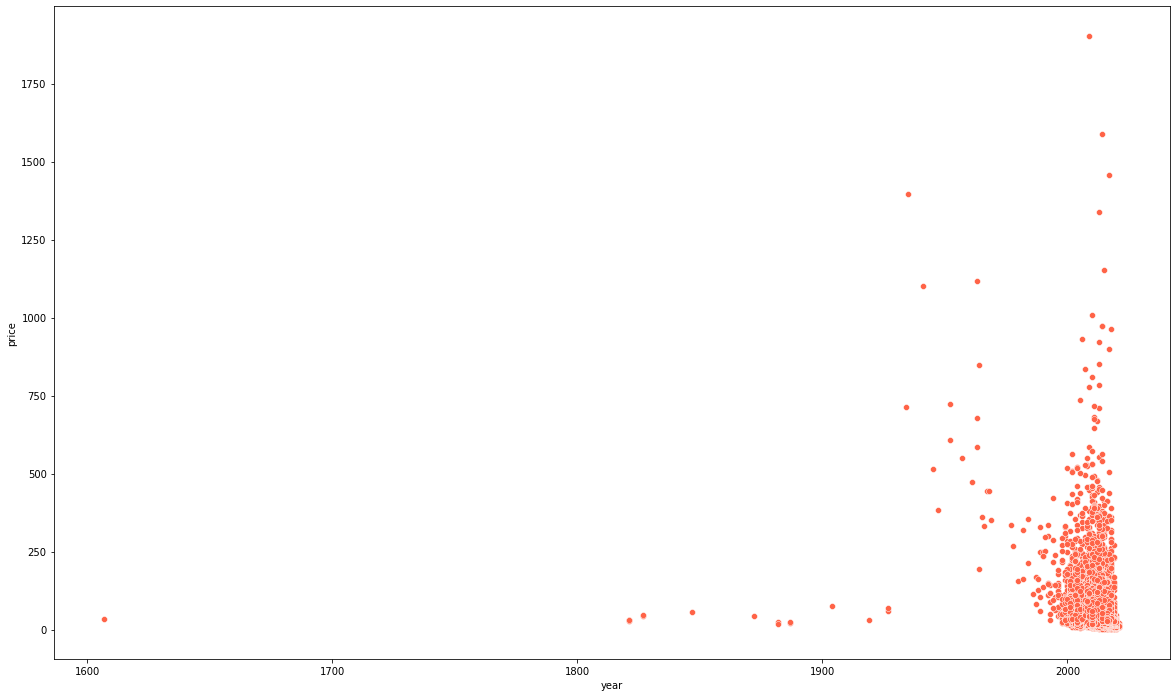

        tenur_vintage
price                
2.0          5.000000
3.0          3.800000
4.0          4.321429
5.0          4.431373
6.0          5.320388
...               ...
1396.0      87.000000
1429.0            NaN
1457.0       5.000000
1590.0       8.000000
1902.0      13.000000

[449 rows x 1 columns]




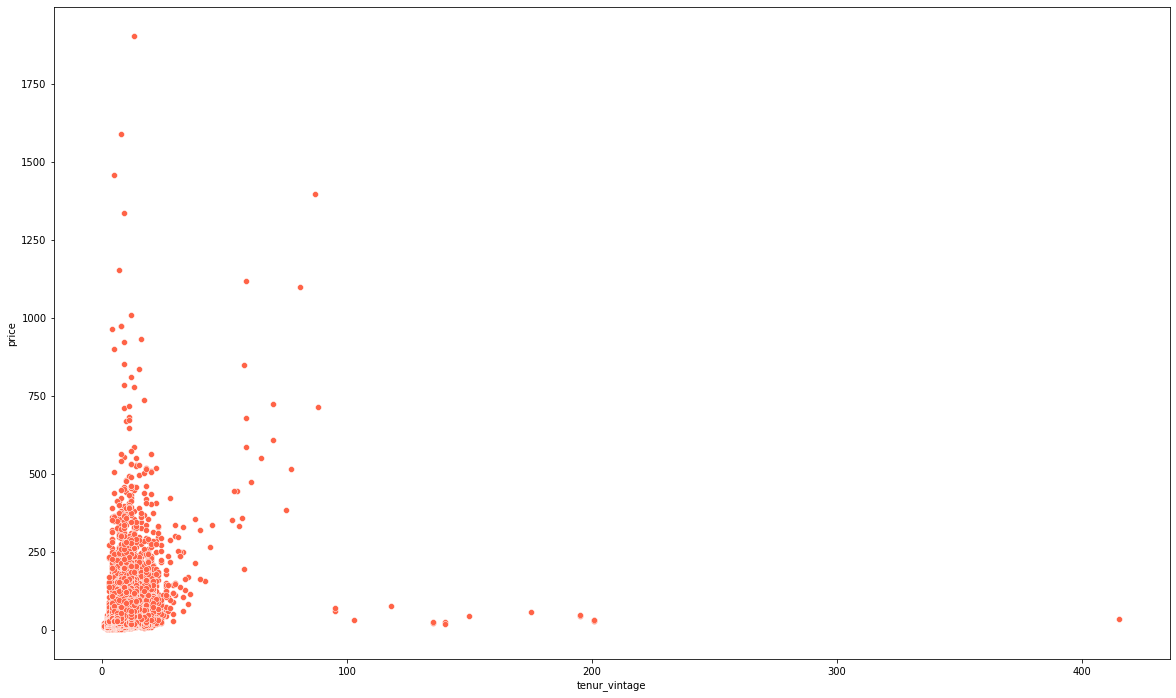

In [ ]:
# Analyse le variable dépendante
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
  # shows the relation of numeric columns with target.
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

    if plot:
      plt.figure(figsize=(20,12))
      sns.scatterplot(data=dataframe, x=numerical_col, y=target, color='tomato')
      plt.show()
for i in num_cols:
  target_summary_with_num(dataframe=df_wine,target='price',numerical_col=i, plot=True)
#year price iliskisine bakarsak cogunlukla 2000 yilina yakin yada 2000 den sonraki saraplarin veri icinde daha fazla oldugu gorunuyor. ama cok az bir korelasyon var gibi yil ile price arasinda.

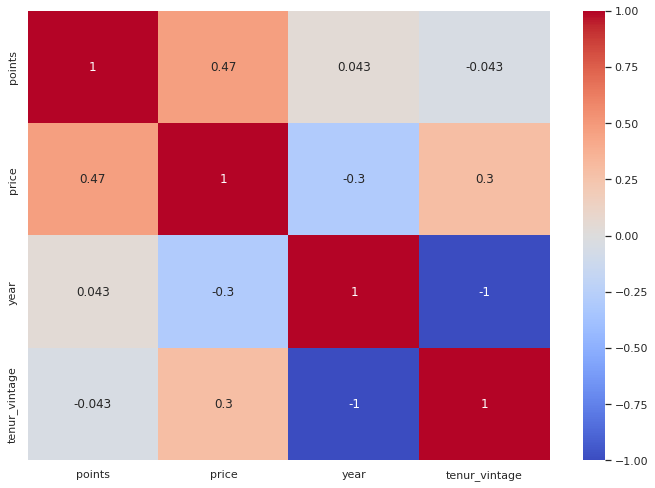

In [ ]:
corrMatrix= df_wine.corr()
sns.set(rc={"figure.figsize": (11.7,8.27)})
sns.heatmap(corrMatrix,annot=True, cmap='coolwarm')
# Entre price et points , il  y a plus correlation que les les autres(%47) ve 
# price ile year arasinda ters korelasyon var(-%30) ve tenur vintage ile %30 korelasyon var.

In [ ]:
import spacy
import nltk
from wordcloud import WordCloud
nlp = spacy.load('en_core_web_sm')
tokenizer=nltk.RegexpTokenizer(r"\w+")
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
def func_clean(sentence="Hello, how are you? Fine, thank you."):
  sent_tokens = nlp(sentence)  
  lema_str = ' '.join(word.lemma_ for word in sent_tokens)
  lema_str=lema_str.lower()
  txt_puntuation=tokenizer.tokenize(lema_str)
  tokens_clean = []
  for words in txt_puntuation:
    if words not in nltk.corpus.stopwords.words("english"):
      tokens_clean.append(words)
  tokens_str = ' '.join(word for word in tokens_clean)
  return tokens_str
func_clean()

'hello fine thank'

In [ ]:
df_wine['description_cleaned']=df_wine['description'].apply(func_clean)
df_wine['description_cleaned']

0         aromas include tropical fruit broom brimstone ...
1         ripe fruity wine smooth still structure firm t...
2         tart snappy flavor lime flesh rind dominate gr...
3         pineapple rind lemon pith orange blossom start...
4         much like regular bottling 2016 come across ra...
                                ...                        
129952    note honeysuckle cantaloupe sweeten deliciousl...
129953    citation give much decade bottle age prior rel...
129954    well drain gravel soil give wine crisp dry cha...
129955    dry style pinot gris crisp acidity also weight...
129956    big rich dry power intense spiciness rounded t...
Name: description_cleaned, Length: 129957, dtype: object

In [ ]:
text_description_cleaned = ' '.join(text for text in df_wine['description_cleaned'])
text_description_cleaned

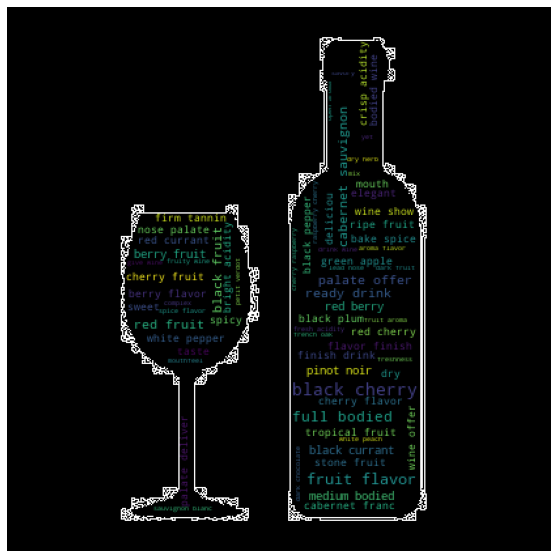

In [ ]:
#worldcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np
win_img_mask = np.array(Image.open('win.png'))

wc = WordCloud(background_color='black', mask=win_img_mask, contour_width=0.5, contour_color="white").generate(text_description_cleaned)
wc.to_file('win_wordcloud.png')

plt.figure(figsize=(16,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## CLEANING

In [ ]:
# oncelikle year median ile dolduralim.
mean_year =df_wine.year.median()    
df_wine['year'].fillna(mean_year, inplace = True) 
df_wine['year'].isnull().sum()

0

In [ ]:
#tenure_wintage tekrar yapilirsa tenure vintage daki na ler gitmis olur.
df_wine['tenur_vintage']=currentYear-df_wine['year']
df_wine['tenur_vintage']

0          5.0
1          7.0
2          5.0
3          5.0
4          6.0
          ... 
129952     5.0
129953    14.0
129954     5.0
129955     6.0
129956     6.0
Name: tenur_vintage, Length: 129957, dtype: float64

In [ ]:
df_wine.isnull().sum()

country                  63
description               0
points                    0
price                  8993
province                 63
title                     0
variety                   1
winery                    0
year                      0
tenur_vintage             0
description_cleaned       0
dtype: int64

In [ ]:
df_wine.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2016, this...
                                ...                        
129952    Notes of honeysuckle and cantaloupe sweeten th...
129953    Citation is given as much as a decade of bottl...
129954    Well-drained gravel soil gives this wine its c...
129955    A dry style of Pinot Gris, this is crisp with ...
129956    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129957, dtype: object

In [ ]:
df_wine.drop(columns=['region_2','taster_twitter_handle','designation','taster_name','region_1'],inplace=True)
# Suppression de variables avec trop de NA et pas d'utiles

KeyError: ignored

In [ ]:
df_wine.isnull().sum()

country                  63
description               0
points                    0
price                  8993
province                 63
title                     0
variety                   1
winery                    0
year                      0
tenur_vintage             0
description_cleaned       0
dtype: int64

In [ ]:
df_wine.shape

(129957, 11)

In [ ]:
df_wine.isnull().sum()

country                  63
description               0
points                    0
price                  8993
province                 63
title                     0
variety                   1
winery                    0
year                      0
tenur_vintage             0
description_cleaned       0
dtype: int64

In [ ]:
#Top 10 country
dict_top10_country=df_wine.country.value_counts().head(10).to_dict()
list_top10_country=list(dict_top10_country.keys())
list_top10_country

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany']

In [ ]:
#Top 10 variety
dict_top10_variety=df_wine.variety.value_counts().head(10).to_dict()
list_top10_variety=list(dict_top10_variety.keys())
list_top10_variety

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [ ]:
#Suppression de données avec NA Price
df_wine_clean=df_wine[~df_wine['price'].isnull()==True]
df_wine_clean

,country,description,points,price,province,title,variety,winery,year,tenur_vintage,description_cleaned
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,20.0,Douro,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2015.0,7.0,ripe fruity wine smooth still structure firm t...
2,US,"Tart and snappy, the flavors of lime flesh and...",87,18.0,Oregon,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2017.0,5.0,tart snappy flavor lime flesh rind dominate gr...
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,18.0,Michigan,St. Julian 2017 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2017.0,5.0,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2016, this...",87,44.0,Oregon,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2016.0,6.0,much like regular bottling 2016 come across ra...
5,Spain,Blackberry and raspberry aromas show a typical...,87,20.0,Northern Spain,Tandem 2015 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2015.0,7.0,blackberry raspberry aroma show typical navarr...
...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,29.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2017.0,5.0,note honeysuckle cantaloupe sweeten deliciousl...
129953,US,Citation is given as much as a decade of bottl...,90,92.0,Oregon,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation,2008.0,14.0,citation give much decade bottle age prior rel...
129954,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2017 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2017.0,5.0,well drain gravel soil give wine crisp dry cha...
129955,France,"A dry style of Pinot Gris, this is crisp with ...",90,33.0,Alsace,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2016.0,6.0,dry style pinot gris crisp acidity also weight...


In [ ]:
df_wine_clean.isnull().sum()

country                59
description             0
points                  0
price                   0
province               59
title                   0
variety                 1
winery                  0
year                    0
tenur_vintage           0
description_cleaned     0
dtype: int64

In [ ]:
# Suppression des données NA
df_wine_clean.dropna(inplace=True)
df_wine_clean

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,country,description,points,price,province,title,variety,winery,year,tenur_vintage,description_cleaned
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,20.0,Douro,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2015.0,7.0,ripe fruity wine smooth still structure firm t...
2,US,"Tart and snappy, the flavors of lime flesh and...",87,18.0,Oregon,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2017.0,5.0,tart snappy flavor lime flesh rind dominate gr...
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,18.0,Michigan,St. Julian 2017 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2017.0,5.0,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2016, this...",87,44.0,Oregon,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2016.0,6.0,much like regular bottling 2016 come across ra...
5,Spain,Blackberry and raspberry aromas show a typical...,87,20.0,Northern Spain,Tandem 2015 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2015.0,7.0,blackberry raspberry aroma show typical navarr...
...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,29.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2017.0,5.0,note honeysuckle cantaloupe sweeten deliciousl...
129953,US,Citation is given as much as a decade of bottl...,90,92.0,Oregon,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation,2008.0,14.0,citation give much decade bottle age prior rel...
129954,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2017 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2017.0,5.0,well drain gravel soil give wine crisp dry cha...
129955,France,"A dry style of Pinot Gris, this is crisp with ...",90,33.0,Alsace,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2016.0,6.0,dry style pinot gris crisp acidity also weight...


In [ ]:
df_wine_clean.isnull().sum()

country                0
description            0
points                 0
price                  0
province               0
title                  0
variety                0
winery                 0
year                   0
tenur_vintage          0
description_cleaned    0
dtype: int64

# Framework: Machine Learning



## FR - Machine Learning (partie 1 : numérique)
Choisis la métrique la plus adaptée, puis entraine différents modèles/paramètres afin de prédire le prix d'une bouteille en fonction de la note ("points") et de l'année. Evalue les scores et conserve uniquement les meilleurs paramètres. Applique le modèle aux 14 vins du Domaine des Croix pour proposer un prix à chaque bouteille.
Pense à séparer le jeu de données et le jeu d'entrainement. Tu peux aussi utiliser CrossValidation et GridSearch.
Pense aussi à standardiser les données pour de meilleurs résultats.


In [ ]:
df_wine_clean.columns

Index(['country', 'description', 'points', 'price', 'province', 'title',
       'variety', 'winery', 'year', 'tenur_vintage', 'description_cleaned'],
      dtype='object')

In [ ]:
X=df_wine_clean[['tenur_vintage','points']]
y=df_wine_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.80)

In [ ]:
#standardisation

# Create and fit a scaler model
scaler = StandardScaler().fit(X_train)

# Your scaler model can now transform your data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [ ]:
#Base Models
models = [('LR', LinearRegression().fit(X_train,y_train)),
          ('KNN', KNeighborsRegressor().fit(X_train,y_train)),
          ('DTR', DecisionTreeRegressor(random_state=1).fit(X_train,y_train)),
          ('RF', RandomForestRegressor(random_state=1).fit(X_train,y_train))]


for name, regressor in models:
    print(f"{name} TRAIN: {regressor.score(X_train,y_train)} ")
    print(f"{name} TEST: {regressor.score(X_test,y_test)} ")
    print("#####################################################")

LR TRAIN: 0.31420861309887504 
LR TEST: 0.3318508568534889 
#####################################################
KNN TRAIN: 0.44254676610350296 
KNN TEST: 0.3109370073960743 
#####################################################
DTR TRAIN: 0.5250582776021644 
DTR TEST: 0.38676269919009754 
#####################################################
RF TRAIN: 0.5192877218902145 
RF TEST: 0.40627691772653196 
#####################################################


In [ ]:
#Base Models avec X_scaled
models = [('LR', LinearRegression().fit(X_train_scaled,y_train)),
          ('KNN', KNeighborsRegressor().fit(X_train_scaled,y_train)),
          ('DTR', DecisionTreeRegressor(random_state=1).fit(X_train_scaled,y_train)),
          ('RF', RandomForestRegressor(random_state=1).fit(X_train_scaled,y_train))]


for name, regressor in models:
    print(f"{name} TRAIN: {regressor.score(X_train_scaled,y_train)} ")
    print(f"{name} TEST: {regressor.score(X_test_scaled,y_test)} ")
    print("#####################################################")

LR TRAIN: 0.31420861309887504 
LR TEST: 0.3318508568534889 
#####################################################
KNN TRAIN: 0.4278526317030872 
KNN TEST: 0.3000724933282749 
#####################################################
DTR TRAIN: 0.5250582776021644 
DTR TEST: 0.3905010075716695 
#####################################################
RF TRAIN: 0.519467934169588 
RF TEST: 0.4066769867257626 
#####################################################


In [ ]:
#Cross validation avec Base models
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('DTR', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor())]

for name, regressor in models:
    cv=cross_val_score(regressor, X, y, cv=3)
    print(f"{name}: {np.mean(cv)} ")

LR: 0.3152212271010581 
KNN: 0.34918851359309216 
DTR: 0.41196042462186383 
RF: 0.4222468176212635 


In [ ]:
#Cross validation avec Base models et avec X_scaled

# Cross validation
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('DTR', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor())]

for name, regressor in models:
    cv=cross_val_score(regressor, X_scaled, y, cv=3)
    print(f"{name}: {np.mean(cv)} ")

LR: 0.31522122710105815 
KNN: 0.34436218099786337 
DTR: 0.40993739021528985 
RF: 0.41712131608932773 


### Model Tuning
 Je choisis ce modèle pour faire des prédictions car le score le plus élevé provient de la Random Forest.

In [ ]:
# RANDOM SEARCH
# j'ai fait d'abord randomsearch pour  raccourcir la grid search
# from sklearn.model_selection import RandomizedSearchCV
# dico = {'max_depth' : range(1,51),
#         "max_features": [5, 7, "auto"],
#         'min_samples_leaf' : range(1,16),
#         'min_samples_split': [2,5,7,10,15,30],
#         'n_estimators':[100,200,300,500,1000]}
# rando = RandomizedSearchCV(RandomForestRegressor(random_state=42), dico ,  cv=3)
# rando.fit(X,y)

In [ ]:
# print("####### RANDOM SEARCH ##############")
# print("best score:",rando.best_score_)
# print("best parameters:",rando.best_params_)
####### RANDOM SEARCH ##############
# best score: 0.457000894939627
# best parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_features': 'auto', 'max_depth': 28}

In [ ]:
# GRID SEARCH

dico = {'max_depth': [16,18],
        'max_features': ['auto'],
        'min_samples_leaf': [ 17,19],
        'min_samples_split': [2,4 ],
        'n_estimators': [100]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), dico , cv = 5,)
grid.fit(X,y)
print("############### GRID SEARCH #################")
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

############### GRID SEARCH #################
best score: 0.4374835728004987
best parameters: {'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 2, 'n_estimators': 100}


### Predictions

In [ ]:
RF_final=RandomForestRegressor(**grid.best_params_,random_state=42).fit(X_train,y_train)

In [ ]:
X_val=df_domaineCroix[['tenur_vintage','points']]
y_val=df_domaineCroix['price']

In [ ]:
# Deviner les prix souhaités
df_domaineCroix['price_pred_part1']=RF_final.predict(X_val)


In [ ]:
df_domaineCroix['price_pred_part1']

0     61.750820
1     56.337946
2     36.656279
3     25.278041
4     56.337946
5     47.078583
6     42.576568
7     76.520254
8     64.127042
9     40.390343
10    42.576568
11    54.909480
12    87.337986
13    37.487614
Name: price_pred_part1, dtype: float64


## Machine Learning (partie 2 : catégories) : 
En plus de la note et de l'année, intégre les 10 cépages (variety) les plus représentés et les 10 pays (country) les plus représentés. Tu peux aussi ajouter la province si tu trouves cela plus précis.
Il faut transformer ces données pour être acceptées par le modèle. Les prédictions sont-elles très différentes de l'étape précédente ? Peux-tu proposer une interprétation ? Est-ce cohérent avec ton analyse descriptive ?

In [ ]:
df_wine_clean.reset_index(inplace=True,drop=True)

In [ ]:
df_wine_clean

,country,description,points,price,province,title,variety,winery,year,tenur_vintage,description_cleaned
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,20.0,Douro,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2015.0,7.0,ripe fruity wine smooth still structure firm t...
1,US,"Tart and snappy, the flavors of lime flesh and...",87,18.0,Oregon,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2017.0,5.0,tart snappy flavor lime flesh rind dominate gr...
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,18.0,Michigan,St. Julian 2017 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2017.0,5.0,pineapple rind lemon pith orange blossom start...
3,US,"Much like the regular bottling from 2016, this...",87,44.0,Oregon,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2016.0,6.0,much like regular bottling 2016 come across ra...
4,Spain,Blackberry and raspberry aromas show a typical...,87,20.0,Northern Spain,Tandem 2015 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2015.0,7.0,blackberry raspberry aroma show typical navarr...
...,...,...,...,...,...,...,...,...,...,...,...
120899,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,29.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2017.0,5.0,note honeysuckle cantaloupe sweeten deliciousl...
120900,US,Citation is given as much as a decade of bottl...,90,92.0,Oregon,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation,2008.0,14.0,citation give much decade bottle age prior rel...
120901,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2017 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2017.0,5.0,well drain gravel soil give wine crisp dry cha...
120902,France,"A dry style of Pinot Gris, this is crisp with ...",90,33.0,Alsace,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2016.0,6.0,dry style pinot gris crisp acidity also weight...


In [ ]:
list_top10_country

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany']

In [ ]:
list_top10_variety

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [ ]:
#Mask sur Country et Variety
df_wine_clean_country=df_wine_clean[(df_wine_clean.country=='US')|(df_wine_clean.country=='France')
                                    |(df_wine_clean.country=='Italy')|(df_wine_clean.country=='Spain')
                                    |(df_wine_clean.country=='Portugal')
                                    |(df_wine_clean.country=='Chile')|(df_wine_clean.country=='Argentina')
                                    |(df_wine_clean.country=='Austria')|(df_wine_clean.country=='Australia')
                                    |(df_wine_clean.country=='Germany')
                                   ]
df_wine_clean_country_variety=df_wine_clean_country[(df_wine_clean_country.variety=='Pinot Noir')
                                                    |(df_wine_clean_country.variety=='Chardonnay')
                                                    |(df_wine_clean_country.variety=='Cabernet Sauvignon')
                                                    |(df_wine_clean_country.variety=='Red Blend')
                                                    |(df_wine_clean_country.variety=='Bordeaux-style Red Blend')
                                                    |(df_wine_clean_country.variety=='Rieslingr')
                                                    |(df_wine_clean_country.variety=='Sauvignon Blanc')
                                                    |(df_wine_clean_country.variety=='Syrah')
                                                    |(df_wine_clean_country.variety=='Rosé')
                                                    |(df_wine_clean_country.variety=='Merlot')
                                                   ]
df_wine_clean_country_variety.reset_index(drop=True,inplace=True)
df_wine_clean_country_variety

,country,description,points,price,province,title,variety,winery,year,tenur_vintage,description_cleaned
0,US,"Much like the regular bottling from 2016, this...",87,44.0,Oregon,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2016.0,6.0,much like regular bottling 2016 come across ra...
1,US,"Soft, supple plum envelopes an oaky structure ...",87,23.0,California,Kirkland Signature 2015 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2015.0,7.0,soft supple plum envelope oaky structure caber...
2,US,"Slightly reduced, this wine offers a chalky, t...",87,29.0,California,Louis M. Martini 2016 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2016.0,6.0,slightly reduce wine offer chalky tannic backb...
3,US,Building on 150 years and six generations of w...,87,18.0,California,Mirassou 2016 Chardonnay (Central Coast),Chardonnay,Mirassou,2016.0,6.0,build 150 year six generation winemaking tradi...
4,US,Ripe aromas of dark berries mingle with ample ...,87,23.0,Virginia,Quiévremont 2016 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2016.0,6.0,ripe aroma dark berry mingle ample note black ...
...,...,...,...,...,...,...,...,...,...,...,...
59148,Italy,"A blend of Nero d'Avola and Syrah, this convey...",90,32.0,Sicily & Sardinia,Baglio del Cristo di Campobello 2016 Adènzia R...,Red Blend,Baglio del Cristo di Campobello,2016.0,6.0,blend nero avola syrah convey aroma scorched e...
59149,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",90,27.0,Sicily & Sardinia,Feudo Principi di Butera 2016 Symposio Red (Te...,Red Blend,Feudo Principi di Butera,2016.0,6.0,blend 65 cabernet sauvignon 30 merlot 5 petit ...
59150,US,There's no bones about the use of oak in this ...,90,32.0,California,Flora Springs 2017 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,2017.0,5.0,bone use oak wine spend nine month enjoy cradl...
59151,Portugal,"Fresh and fruity, this is full of red cherry f...",90,59.0,Douro,Caves Transmontanas 2010 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2010.0,12.0,fresh fruity full red cherry flavor crisp acid...


In [ ]:
#Encodage des valeurs Country et Variety
df_wine_clean_country_variety=pd.concat([df_wine_clean_country_variety,df_wine_clean_country_variety['country'].str.get_dummies()],axis=1)
df_wine_clean_country_variety=pd.concat([df_wine_clean_country_variety,df_wine_clean_country_variety['variety'].str.get_dummies()],axis=1)
df_wine_clean_country_variety.drop(columns=['country','variety'],axis=1,inplace=True)
df_wine_clean_country_variety

,description,points,price,province,title,winery,year,tenur_vintage,description_cleaned,Argentina,...,US,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Merlot,Pinot Noir,Red Blend,Rosé,Sauvignon Blanc,Syrah
0,"Much like the regular bottling from 2016, this...",87,44.0,Oregon,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Sweet Cheeks,2016.0,6.0,much like regular bottling 2016 come across ra...,0,...,1,0,0,0,0,1,0,0,0,0
1,"Soft, supple plum envelopes an oaky structure ...",87,23.0,California,Kirkland Signature 2015 Mountain Cuvée Caberne...,Kirkland Signature,2015.0,7.0,soft supple plum envelope oaky structure caber...,0,...,1,0,1,0,0,0,0,0,0,0
2,"Slightly reduced, this wine offers a chalky, t...",87,29.0,California,Louis M. Martini 2016 Cabernet Sauvignon (Alex...,Louis M. Martini,2016.0,6.0,slightly reduce wine offer chalky tannic backb...,0,...,1,0,1,0,0,0,0,0,0,0
3,Building on 150 years and six generations of w...,87,18.0,California,Mirassou 2016 Chardonnay (Central Coast),Mirassou,2016.0,6.0,build 150 year six generation winemaking tradi...,0,...,1,0,0,1,0,0,0,0,0,0
4,Ripe aromas of dark berries mingle with ample ...,87,23.0,Virginia,Quiévremont 2016 Vin de Maison Red (Virginia),Quiévremont,2016.0,6.0,ripe aroma dark berry mingle ample note black ...,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59148,"A blend of Nero d'Avola and Syrah, this convey...",90,32.0,Sicily & Sardinia,Baglio del Cristo di Campobello 2016 Adènzia R...,Baglio del Cristo di Campobello,2016.0,6.0,blend nero avola syrah convey aroma scorched e...,0,...,0,0,0,0,0,0,1,0,0,0
59149,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",90,27.0,Sicily & Sardinia,Feudo Principi di Butera 2016 Symposio Red (Te...,Feudo Principi di Butera,2016.0,6.0,blend 65 cabernet sauvignon 30 merlot 5 petit ...,0,...,0,0,0,0,0,0,1,0,0,0
59150,There's no bones about the use of oak in this ...,90,32.0,California,Flora Springs 2017 Barrel Fermented Chardonnay...,Flora Springs,2017.0,5.0,bone use oak wine spend nine month enjoy cradl...,0,...,1,0,0,1,0,0,0,0,0,0
59151,"Fresh and fruity, this is full of red cherry f...",90,59.0,Douro,Caves Transmontanas 2010 Vértice Pinot Noir (D...,Caves Transmontanas,2010.0,12.0,fresh fruity full red cherry flavor crisp acid...,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_wine_clean_country_variety.columns

Index(['description', 'points', 'price', 'province', 'title', 'winery', 'year',
       'tenur_vintage', 'description_cleaned', 'Argentina', 'Australia',
       'Austria', 'Chile', 'France', 'Germany', 'Italy', 'Portugal', 'Spain',
       'US', 'Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay',
       'Merlot', 'Pinot Noir', 'Red Blend', 'Rosé', 'Sauvignon Blanc',
       'Syrah'],
      dtype='object')

In [ ]:
# Train test split
X1=df_wine_clean_country_variety[['points','tenur_vintage',
                                  'Argentina',
                                  'Australia',
                                  'Austria', 
                                  'Chile', 
                                  'France', 
                                  'Germany',
                                   'Italy',
                                  'Portugal', 
                                  'Spain', 
                                  'US', 
                                  'Bordeaux-style Red Blend',
                                   'Cabernet Sauvignon', 
                                  'Chardonnay', 
                                  'Merlot', 
                                  'Pinot Noir', 
                                  'Red Blend',
                                   'Rosé', 
                                  'Sauvignon Blanc', 
                                  'Syrah'
                                 ]]
y1=df_wine_clean_country_variety['price']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1, train_size = 0.80)

In [ ]:
#standardisation
from sklearn.preprocessing import StandardScaler
# Create and fit a scaler model
scaler = StandardScaler().fit(X1_train)

# Your scaler model can now transform your data
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X1_scaled=scaler.transform(X1)

In [ ]:
#Base Models
models = [('LR', LinearRegression().fit(X1_train,y1_train)),
          ('KNN', KNeighborsRegressor().fit(X1_train,y1_train)),
          ('DTR', DecisionTreeRegressor(random_state=1).fit(X1_train,y1_train)),
          ('RF', RandomForestRegressor(random_state=1).fit(X1_train,y1_train))]


for name, regressor in models:
    print(f"{name} TRAIN: {regressor.score(X1_train,y1_train)} ")
    print(f"{name} TEST: {regressor.score(X1_test,y1_test)} ")
    print("#####################################################")


LR TRAIN: 0.3577398604435492 
LR TEST: 0.3392783628567918 
#####################################################
KNN TRAIN: 0.5956555254261402 
KNN TEST: 0.4057800496947137 
#####################################################
DTR TRAIN: 0.6923300268392082 
DTR TEST: 0.393307925950794 
#####################################################
RF TRAIN: 0.6824922928547338 
RF TEST: 0.4243161787332421 
#####################################################


In [ ]:
#Base Models avec x_scaled
models = [('LR', LinearRegression().fit(X1_train_scaled,y1_train)),
          ('KNN', KNeighborsRegressor().fit(X1_train_scaled,y1_train)),
          ('DTR', DecisionTreeRegressor(random_state=1).fit(X1_train_scaled,y1_train)),
          ('RF', RandomForestRegressor(random_state=1).fit(X1_train_scaled,y1_train))]


for name, regressor in models:
    print(f"{name} TRAIN: {regressor.score(X1_train_scaled,y1_train)} ")
    print(f"{name} TEST: {regressor.score(X1_test_scaled,y1_test)} ")
    print("#####################################################")

LR TRAIN: 0.3576109406719348 
LR TEST: 0.339108700560003 
#####################################################
KNN TRAIN: 0.6047629647635127 
KNN TEST: 0.40337376286438986 
#####################################################
DTR TRAIN: 0.6923300268392082 
DTR TEST: 0.3957125352594497 
#####################################################
RF TRAIN: 0.6823774022125724 
RF TEST: 0.4230966725583669 
#####################################################


In [ ]:
#Cross validation avec base models
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('DTR', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor())]

for name, regressor in models:
    cv=cross_val_score(regressor, X1, y1, cv=5)
    print(f"{name}: {np.mean(cv)} ")

LR: 0.3632963891506301 
KNN: 0.43525677231213217 
DTR: 0.3038029553585627 
RF: 0.37469174333523336 


In [ ]:
#Cross validation avec Base models et X_scaled
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('DTR', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor())]

for name, regressor in models:
    cv=cross_val_score(regressor, X1_scaled, y1, cv=3)
    print(f"{name}: {np.mean(cv)} ")

LR: 0.35771715086027306 
KNN: 0.44024784166091263 
DTR: 0.26069120518360034 
RF: 0.3857499644938828 


### Model Tuning
Comme KNN score est plus élevé, j'ai choisit ce model pour model tuning

In [ ]:
# Random Search

# j'ai fait d'abord randomsearch pour  raccourcir la grid search
from sklearn.model_selection import RandomizedSearchCV
dico = {'n_neighbors' : range(8,16),
        "weights": ['uniform', 'distance']}
rando = RandomizedSearchCV(KNeighborsRegressor(), dico ,  cv=5,n_iter=10,n_jobs=-1)
rando.fit(X1_scaled,y1)
print("####### RANDOM SEARCH ##############")
print("best score:",rando.best_score_)
print("best parameters:",rando.best_params_)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


####### RANDOM SEARCH ##############
best score: 0.5019809001807224
best parameters: {'weights': 'uniform', 'n_neighbors': 15}


In [ ]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV
dico = {'n_neighbors' : [14,15],
        "weights": ['uniform']}
grid = GridSearchCV(KNeighborsRegressor(), dico , cv = 5,)
grid.fit(X1_scaled,y1)
print("############### GRID SEARCH #################")
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

############### GRID SEARCH #################
best score: 0.502016784165219
best parameters: {'n_neighbors': 15, 'weights': 'uniform'}


### Predictions

In [ ]:
df_domaineCroix
df_domaineCroix_country=pd.concat([df_domaineCroix,df_domaineCroix['country'].str.get_dummies()],axis=1)
df_domaineCroix_country_variety=pd.concat([df_domaineCroix_country,df_domaineCroix_country['variety'].str.get_dummies()],axis=1)
df_domaineCroix_country_variety.drop(columns=['country','variety'],axis=1,inplace=True)
df_domaineCroix_country_variety

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,winery,year,tenur_vintage,price_pred_part1,France,Chardonnay,Pinot Noir
0,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Domaine des Croix,2016,6,61.750820,1,0,1
1,A rich wine with great fruits as well as struc...,La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 La Vigne au Saint (Cor...,Domaine des Croix,2017,5,56.337946,1,0,1
2,"A perfumed village wine, this is made from fou...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Beaune,Domaine des Croix,2016,6,36.656279,1,0,1
3,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Beaune,Domaine des Croix,2019,3,25.278041,1,0,1
4,This wine is perfumed with cherries and red be...,Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 Les Grèves Premier Cru ...,Domaine des Croix,2017,5,56.337946,1,0,1
5,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Domaine des Croix,2015,7,47.078583,1,0,1
6,"While this wine is firm, with some fine tannin...",Les Cent-Vignes Premier Cru,93,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 Les Cent-Vignes Premier...,Domaine des Croix,2018,4,42.576568,1,0,1
7,This wine has a smoky character that gives an ...,Grèves,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Grèves (Corton),Domaine des Croix,2016,6,76.520254,1,0,1
8,"Dark fruit backs up the dense, dark and firm c...",La Vigne au Saint,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 La Vigne au Saint (Cor...,Domaine des Croix,2018,4,64.127042,1,0,1
9,"A fine, mineral, structured wine with a very d...",Bressandes Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Bressandes Premier Cru ...,Domaine des Croix,2019,3,40.390343,1,0,1


In [ ]:
X1.columns

Index(['points', 'tenur_vintage', 'Argentina', 'Australia', 'Austria', 'Chile',
       'France', 'Germany', 'Italy', 'Portugal', 'Spain', 'US',
       'Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay',
       'Merlot', 'Pinot Noir', 'Red Blend', 'Rosé', 'Sauvignon Blanc',
       'Syrah'],
      dtype='object')

In [ ]:
df_domaineCroix_country_variety.columns

Index(['description', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'winery',
       'year', 'tenur_vintage', 'price_pred_part1', 'France', 'Chardonnay',
       'Pinot Noir'],
      dtype='object')

In [ ]:
#df_domaineCroix_country_variety n'a pas les mêmes colonnes que l'autre dataframe pour faire des prédictions. Je n'ajouterai donc que des colonnes composées de 0.
df = pd.DataFrame(np.zeros((14, 16)))
df.columns=['Argentina', 'Australia', 'Austria', 'Chile', 'Germany', 'Italy', 'Portugal', 'Spain', 'US','Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Merlot', 'Red Blend', 'Rosé', 'Sauvignon Blanc','Syrah']
df


,Argentina,Australia,Austria,Chile,Germany,Italy,Portugal,Spain,US,Bordeaux-style Red Blend,Cabernet Sauvignon,Merlot,Red Blend,Rosé,Sauvignon Blanc,Syrah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concat 
df_domaineCroix_country_variety=pd.concat([df_domaineCroix_country_variety,df],axis=1)

In [ ]:
X1_val=df_domaineCroix_country_variety[['points', 'year', 'Argentina', 'Australia', 'Austria', 'Chile',
       'France', 'Germany', 'Italy', 'Portugal', 'Spain', 'US',
       'Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay',
       'Merlot', 'Pinot Noir', 'Red Blend', 'Rosé', 'Sauvignon Blanc',
       'Syrah']]
y1_val=df_domaineCroix['price']

In [ ]:
# Standardisation
X1_val_scaled=scaler.transform(X1_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- year
Feature names seen at fit time, yet now missing:
- tenur_vintage

  warnings.warn(message, FutureWarning)


In [ ]:
# deviner les prix souhaités
KNN_final=KNeighborsRegressor(**grid.best_params_).fit(X1_train,y1_train)
df_domaineCroix['price_pred_part2']=KNN_final.predict(X1_val)
df_domaineCroix['price_pred_part2']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- year
Feature names seen at fit time, yet now missing:
- tenur_vintage

  warnings.warn(message, FutureWarning)


0     179.866667
1     179.866667
2     179.866667
3     179.866667
4     179.866667
5     179.866667
6     179.866667
7     179.866667
8     179.866667
9     179.866667
10    179.866667
11    179.866667
12    179.866667
13    179.866667
Name: price_pred_part2, dtype: float64

In [ ]:
df_domaineCroix.to_csv('df_prediction.csv')